In [1]:
import numpy as np
import matplotlib.pyplot as plt

from graphqec import RotatedSurfaceCode, ThresholdLAB

In [2]:
rsc = RotatedSurfaceCode(
    distance = 3,
    depolarize1_rate = 0.01,
    depolarize2_rate = 0.01
)

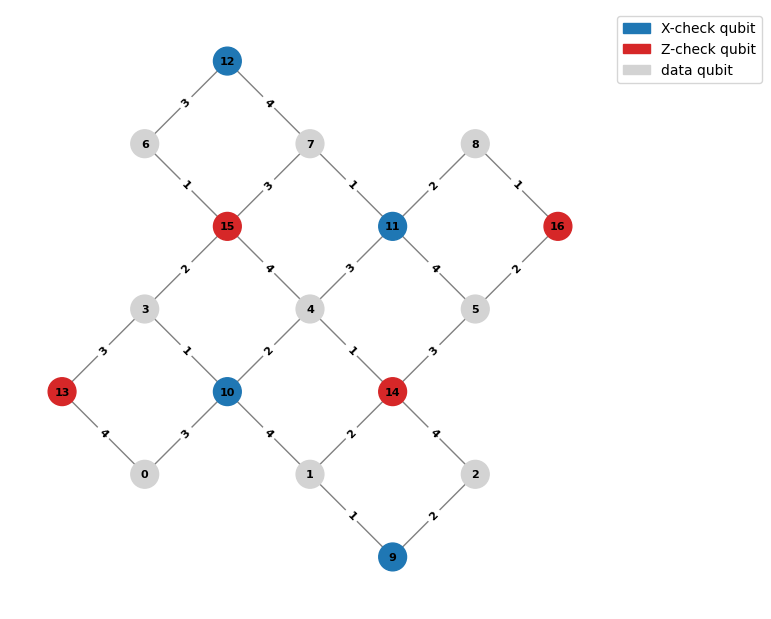

In [3]:
rsc.draw_graph()

In [4]:
rsc.build_memory_circuit(number_of_rounds=1)
rsc.memory_circuit.diagram()

q0: -R-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------DEPOLARIZE1(0.01)--M:rec[8]--DETECTOR:D4=rec[11]*rec[8]*rec[4]------------------OBSERVABLE_INCLUDE:L0*=rec[8]*rec[12]*rec[16]-
                                                                                                                                                                                                                                                                                              | |                                                                                                                                                                                 | |
 q1: -R-DEPOLARIZE1(0.01)---------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)--M:rec[9]--DETECTOR:D5=rec[12]*rec[9]*rec[13]*rec[10]*rec[5]------------------------------------------------
                                              | |                                                                                                                                                                                 | |                                                         | |                                                                                                                     | |                                                         | |
 q2: -R-DEPOLARIZE1(0.01)---------------------|-|---------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------|-|---------------------------------------------------------------------------------------------------------------------|-|---------------------------------------------------------|-|-----------------@-DEPOLARIZE2(0.01)---------------------------------------------------------------------DEPOLARIZE1(0.01)--M:rec[10]--------------------------------------------------------------------------------------------------
                                              | |                                                                                                                     | |                                                         | |                                                         | |                                                                                                                     | |                                                         | |                 | |
 q3: -R-DEPOLARIZE1(0.01)---------------------|-|-----------------X-DEPOLARIZE2(0.01)---------------------------------------------------------------------------------|-|---------------------------------------------------------|-|-----------------@-DEPOLARIZE2(0.01)---------------------|-|---------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------|-

In [5]:
th = ThresholdLAB(
    configurations = [{"distance": d} for d in [3, 5, 7, 11]],
    code =RotatedSurfaceCode,
    error_rates = np.linspace(0, 0.02, 10)
)

th.collect_stats(num_shots=10**5)

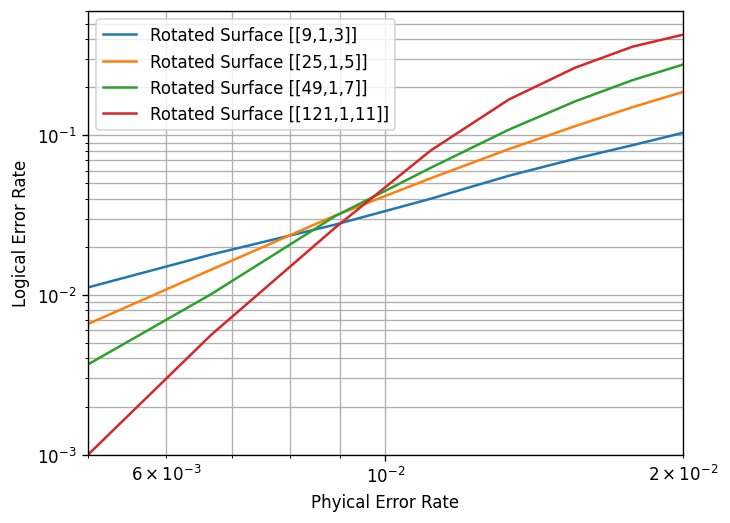

In [6]:
th.plot_stats(
    x_min = 5e-3, 
    x_max = 2e-2,
    y_min = 1e-3, 
    y_max = 6e-1
)